# Linear regression

You are working for a research lab, and the lab has asked you to purchase a spectrometer for some experiments. While scanning the internet, you have managed to collect a good amount of data on different spectrometers. 

The file spectrometer_price.xlsx contains the relevant dataset. Here's a description of the columns:

- Company: Name of the company manufacturing the spectrometer.
- Year: The year in which the spectrometer was manufactured.
- InstArea: the main instrument area (cm2).
- HolderArea: Remainder of the area that holds other supplementary components (cm2).
- Rating: Average ratings given for the spectrometer by customers.
- Price: the price of the spectrometer (dollars).

Being a curious data scientist, you want to now predict the price of the spectrometer given its attributes using a linear regression model.  

Here's a template that assigns several tasks for you and also provides a roadmap to guide you. Please note, you are free to follow your own coding style and name the variables the way you like. 

## 1. Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 2. Load the data

In [2]:
raw_data = pd.read_excel('spectrometer_price.xlsx')
raw_data.head()

,Company,Year,InstArea,HolderArea,Rating,Price
0,Star,2003,213.75,938.89,7,2085.0
1,Star,1976,157.75,1066.67,6,1815.0
2,Star,2001,223.25,1250.00,7,2235.0
3,Star,1915,214.62,1061.11,7,1400.0
4,Star,2000,274.75,1584.44,8,2500.0


## 3. Explore the descriptive statistics

In [3]:
raw_data.describe(include='all')

,Company,Year,InstArea,HolderArea,Rating,Price
count,1379,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000
unique,5,NaN,NaN,NaN,NaN,NaN
top,Star,NaN,NaN,NaN,NaN,NaN
freq,1101,NaN,NaN,NaN,NaN,NaN
mean,NaN,1972.958666,191.836149,1188.423698,6.187092,1854.795112
std,NaN,29.379883,64.892622,1134.967028,1.345780,790.238906
min,NaN,1880.000000,54.750000,144.440000,2.000000,353.110000
25%,NaN,1955.000000,144.250000,860.110000,5.000000,1340.000000
50%,NaN,1976.000000,184.880000,1065.670000,6.000000,1675.000000
75%,NaN,2001.000000,223.750000,1300.945000,7.000000,2177.500000


## 4. Data preprocessing

If necessary, we carry out preprocessing here. However, in this example, we don't need to do this. So, we can proceed ahead.

## 5. Check the OLS assumptions

### 5.1 Check for Linearity

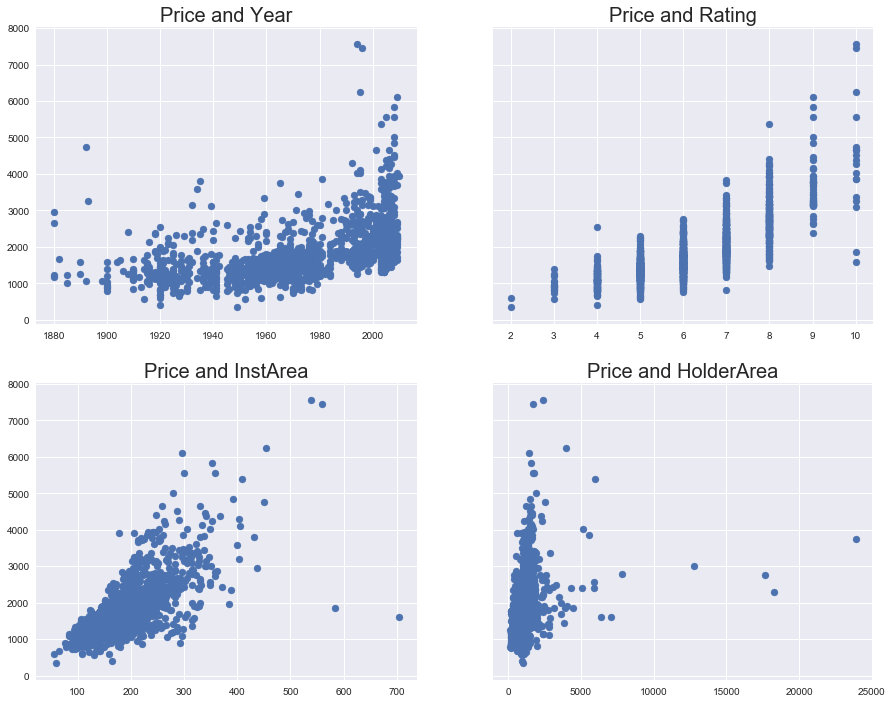

In [4]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize =(15,12))

ax1.scatter(raw_data['Year'], raw_data['Price'])
ax1.set_title('Price and Year', fontsize=20)

ax2.scatter(raw_data['Rating'],raw_data['Price'])
ax2.set_title('Price and Rating', fontsize=20)

ax3.scatter(raw_data['InstArea'],raw_data['Price'])
ax3.set_title('Price and InstArea', fontsize=20)

ax4.scatter(raw_data['HolderArea'],raw_data['Price'])
ax4.set_title('Price and HolderArea', fontsize=20)

plt.show()

Above, we have plotted the target (Price) against all the numerical features in the dataset. From these plots, it seems like Price vs. Year graph is not linear. One could argue that the other plots might not be strictly linear - but we need to look at the fact that this is real-life data and as such, trends are never strictly linear. So, we need to have an approximately linear-looking graph to go ahead with linear regression.

In what follows, write a code that will obtain an optimized quadratic fit to the Price vs. Year plot. Other functions could also be explored, such as higher degree polynomials and power law functions. If you would like to test other better fits than quadratic, then please give it a shot in your free time, and see how those functions affect the final predictions.

In [5]:
def poly_year(x, a, b, c):
    return a * (x + b)**2 + c

x, y = raw_data['Year'].values, raw_data['Price'].values

# curve fitting
from scipy.optimize import curve_fit
popt, _ = curve_fit(poly_year, x, y)

# summarize the parameter values
a, b, c = popt
print('y = %.5f * (x + %.5f)**2 + %.5f' % (a, b, c))

y = 0.23142 * (x + -1933.78688)**2 + 1300.07434


Show the optimized quadratic curve on the scatter plot of Year vs. Price to see how well the curve fits

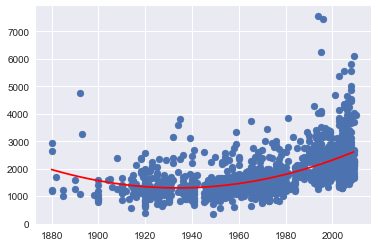

In [6]:
# plot Year vs Price (a scatter plot)
plt.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs to plot the quadratic line obtained
x_line = np.arange(min(x), max(x), 1)

# calculate the output (quadratic fit) for the range
y_line = poly_year(x_line, a, b, c)

# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
plt.show()

In [10]:
# Now we understand that Price could be roughly proportional to (Year + b)^2, rather than just Year. 
# So, create a new column in raw_data that adds the quadratic expression
mod_year = (x + b)**2
raw_data['mod_Year'] = mod_year
raw_data.head()

,Company,Year,InstArea,HolderArea,Rating,Price,mod_Year
0,Star,2003,213.75,938.89,7,2085.0,4790.455449
1,Star,1976,157.75,1066.67,6,1815.0,1781.947176
2,Star,2001,223.25,1250.00,7,2235.0,4517.602985
3,Star,1915,214.62,1061.11,7,1400.0,352.947004
4,Star,2000,274.75,1584.44,8,2500.0,4384.176752


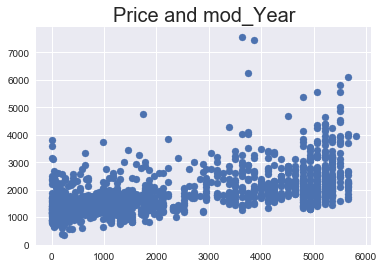

In [11]:
# Check if Price vs. (Year + b)^2 is linear or not using a scatter plot
plt.scatter(raw_data['mod_Year'], raw_data['Price'])
plt.title('Price and mod_Year', fontsize=20)
plt.show()

In [12]:
# Drop the Year column since it is not necessary
raw_data = raw_data.drop(['Year'],axis=1)
raw_data.head()

,Company,InstArea,HolderArea,Rating,Price,mod_Year
0,Star,213.75,938.89,7,2085.0,4790.455449
1,Star,157.75,1066.67,6,1815.0,1781.947176
2,Star,223.25,1250.00,7,2235.0,4517.602985
3,Star,214.62,1061.11,7,1400.0,352.947004
4,Star,274.75,1584.44,8,2500.0,4384.176752


### 5.2 Check for Homoscedasticity

In [13]:
log_price = np.log(raw_data['Price'])
raw_data['log_Price'] = log_price
raw_data.head()

,Company,InstArea,HolderArea,Rating,Price,mod_Year,log_Price
0,Star,213.75,938.89,7,2085.0,4790.455449,7.642524
1,Star,157.75,1066.67,6,1815.0,1781.947176,7.503841
2,Star,223.25,1250.00,7,2235.0,4517.602985,7.711997
3,Star,214.62,1061.11,7,1400.0,352.947004,7.244228
4,Star,274.75,1584.44,8,2500.0,4384.176752,7.824046


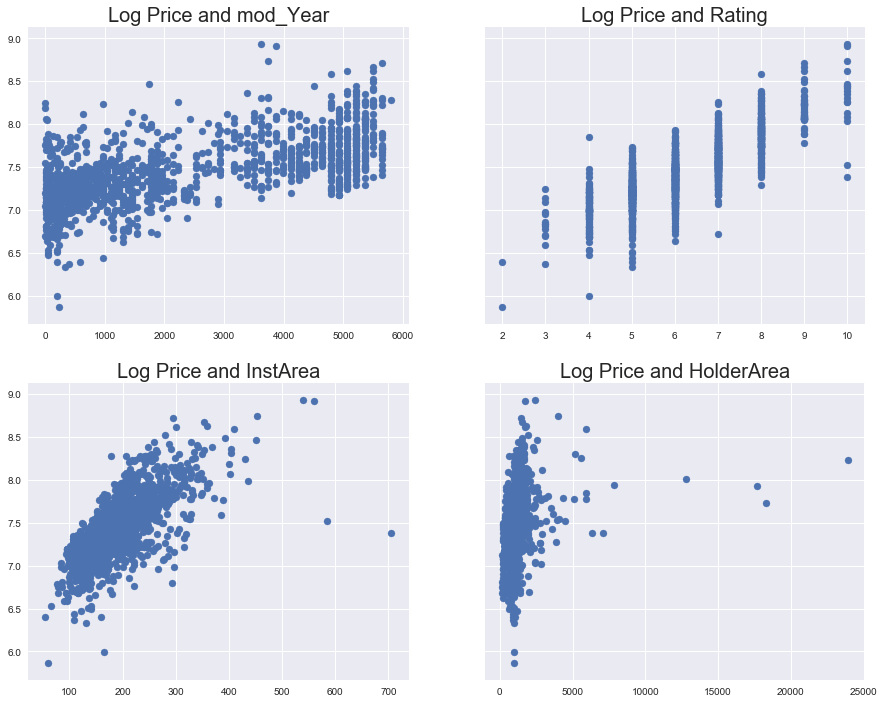

In [14]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize =(15,12))

ax1.scatter(raw_data['mod_Year'],raw_data['log_Price'])
ax1.set_title('Log Price and mod_Year', fontsize=20)

ax2.scatter(raw_data['Rating'],raw_data['log_Price'])
ax2.set_title('Log Price and Rating', fontsize=20)

ax3.scatter(raw_data['InstArea'],raw_data['log_Price'])
ax3.set_title('Log Price and InstArea', fontsize=20)

ax4.scatter(raw_data['HolderArea'],raw_data['log_Price'])
ax4.set_title('Log Price and HolderArea', fontsize=20)

plt.show()

Look at the combinations we tried above. It seems like by taking log of Price, we are able to reduce heteroscedasticity. Not perfect, but we have better looking scatter plots.

### 5.3 Check for Autocorrelation

No reason to expect autocorrelation. The data was collected randomly and list different manufacturers and their products.

### 5.4 Check for Multicollinearity

In [15]:
# Correlation matrix
raw_data.corr(method='pearson')

,InstArea,HolderArea,Rating,Price,mod_Year,log_Price
InstArea,1.000000,0.257244,0.589583,0.708170,0.314804,0.702121
HolderArea,0.257244,1.000000,0.090016,0.252921,-0.033595,0.247431
Rating,0.589583,0.090016,1.000000,0.787228,0.684312,0.813365
Price,0.708170,0.252921,0.787228,1.000000,0.579261,0.954114
mod_Year,0.314804,-0.033595,0.684312,0.579261,1.000000,0.631745
log_Price,0.702121,0.247431,0.813365,0.954114,0.631745,1.000000


In [16]:
# VIF method
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = raw_data[['InstArea', 'Rating', 'HolderArea', 'mod_Year']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [17]:
vif

,VIF,features
0,16.192938,InstArea
1,19.978132,Rating
2,2.273324,HolderArea
3,3.696037,mod_Year


In [18]:
raw_data = raw_data.drop(['Rating'],axis=1)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = raw_data[['InstArea', 'HolderArea', 'mod_Year']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [20]:
vif

,VIF,features
0,4.319516,InstArea
1,2.255477,HolderArea
2,2.753094,mod_Year


## 6. Create dummy variables

In [21]:
cals = raw_data['Company'].unique()
sorted(cals)

['Fisher', 'Hama', 'Spectra', 'Star', 'Thermo']

In [22]:
raw_data_with_dummies = pd.get_dummies(raw_data, drop_first=True)

In [23]:
raw_data_with_dummies.head()

,InstArea,HolderArea,Price,mod_Year,log_Price,Company_Hama,Company_Spectra,Company_Star,Company_Thermo
0,213.75,938.89,2085.0,4790.455449,7.642524,0,0,1,0
1,157.75,1066.67,1815.0,1781.947176,7.503841,0,0,1,0
2,223.25,1250.00,2235.0,4517.602985,7.711997,0,0,1,0
3,214.62,1061.11,1400.0,352.947004,7.244228,0,0,1,0
4,274.75,1584.44,2500.0,4384.176752,7.824046,0,0,1,0


### 6.1 Check for VIF with dummy variables

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = raw_data_with_dummies.drop(['log_Price', 'Price'], axis=1)

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [25]:
vif

,VIF,features
0,11.240693,InstArea
1,2.356342,HolderArea
2,3.204460,mod_Year
3,1.594105,Company_Hama
4,1.032797,Company_Spectra
5,8.444702,Company_Star
6,1.917430,Company_Thermo


In [26]:
data_pp = raw_data_with_dummies.drop(['Price'], axis=1)
data_pp.head()

,InstArea,HolderArea,mod_Year,log_Price,Company_Hama,Company_Spectra,Company_Star,Company_Thermo
0,213.75,938.89,4790.455449,7.642524,0,0,1,0
1,157.75,1066.67,1781.947176,7.503841,0,0,1,0
2,223.25,1250.00,4517.602985,7.711997,0,0,1,0
3,214.62,1061.11,352.947004,7.244228,0,0,1,0
4,274.75,1584.44,4384.176752,7.824046,0,0,1,0


# 7. Perform Linear regression

### 7.1 Declare the inputs and the targets

In [27]:
targets = data_pp['log_Price']
inputs  = data_pp.drop(['log_Price'], axis=1)

### 7.2 Feature scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
inputs_scaled = scaler.transform(inputs)

In [30]:
inputs_scaled

array([[ 0.33781653, -0.21993963,  1.21049766, ..., -0.0763882 ,
         0.50249152, -0.40340039],
       [-0.52546058, -0.10731401, -0.31105225, ..., -0.0763882 ,
         0.50249152, -0.40340039],
       [ 0.48426533,  0.05427351,  1.07250281, ..., -0.0763882 ,
         0.50249152, -0.40340039],
       ..., 
       [ 1.55179997, -0.16196097, -1.18595653, ..., -0.0763882 ,
         0.50249152, -0.40340039],
       [-0.88002082, -0.09585578, -1.0793264 , ..., -0.0763882 ,
         0.50249152, -0.40340039],
       [-0.53702233, -0.0743143 , -0.71953989, ..., -0.0763882 ,
         0.50249152, -0.40340039]])

### 7.3 Train test split

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=10)

### 7.4 Build the model

In [32]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 7.5 Find the coefficients (or weights in machine learning language, since the features are scaled here)

In [33]:
reg.coef_

array([ 0.18406156,  0.0342056 ,  0.16550088,  0.03138556, -0.03679136,
        0.07691341,  0.00626972])

In [34]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,InstArea,0.184062
1,HolderArea,0.034206
2,mod_Year,0.165501
3,Company_Hama,0.031386
4,Company_Spectra,-0.036791
5,Company_Star,0.076913
6,Company_Thermo,0.006270


- Can you gauge the importance of features (feature selection) from these weights?
- What can you say about the relative importance of the categorical variables, i.e. which category is more important and which is not?

### 7.6 Now use you model to predict on the testing dataset

Note that the testing dataset is something your model hasn't seen. So, it provides a useful way to check how well you model performs on new data.

In [35]:
y_hat_test = reg.predict(x_test)

Plot predictions (y_hat_test) vs. target values (y_test) to see how well your model did

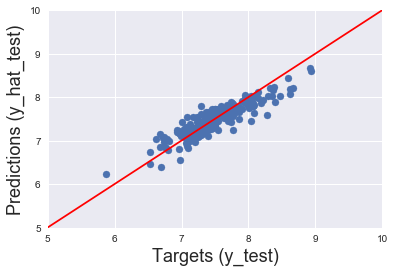

In [38]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(5,10)
plt.ylim(5,10)

xx = np.arange(4,11,0.1)
yy = xx

plt.plot(xx, yy, '-', color='red')

plt.show()

In [40]:
# Calculate R^2
reg.score(x_test,y_test)

0.79867531270880976

In [40]:
# Calculate R^2
reg.score(x_test,y_test)

0.79867531270880976

### 7.7 Metrics to evaluate the model

Calculate R-squared

In [59]:
reg.score(x_test,y_test)

0.79867531270880976

Calculate MSE (mean squared error) in order to see how well your model has done. MSE is another good metric to check for accuracy and improve upon the model. MSE is a general metric that can be used for many models, while R-squared is restricted to linear reg

In [60]:
df_pf = pd.DataFrame()
df_pf['Target'] = np.exp(y_test)
df_pf['Prediction'] = np.exp(y_hat_test)
df_pf.head()

,Target,Prediction
0,2000.0,2004.429160
1,1493.5,1407.224375
2,1150.0,1241.845048
3,1190.0,963.444377
4,1020.0,1320.276618


In [57]:
from sklearn.metrics import mean_squared_error as mse
print(mse(df_pf['Target'], df_pf['Prediction']))

219877.383837
